In [16]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
from keras.utils.vis_utils import plot_model

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *

%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

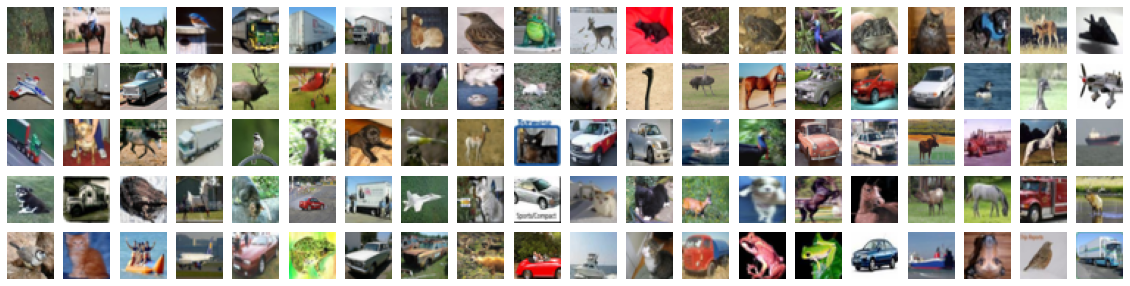

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)

In [3]:
num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [4]:
model = build_vgg_model()
model.load_weights('cifar10vgg.h5')

In [5]:
for i in range(54):
    model.layers[i].trainable = False

for i in range(54,len(model.layers)):
    model.layers[i].trainable = True

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        2

In [7]:
model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 11s 40ms/step - loss: 0.2084 - accuracy: 0.9959 - val_loss: 0.5544 - val_accuracy: 0.9340
Epoch 2/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2111 - accuracy: 0.9960 - val_loss: 0.5406 - val_accuracy: 0.9329
Epoch 3/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2143 - accuracy: 0.9957 - val_loss: 0.5408 - val_accuracy: 0.9349
Epoch 4/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2167 - accuracy: 0.9953 - val_loss: 0.5197 - val_accuracy: 0.9334
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2130 - accuracy: 0.9964 - val_loss: 0.5345 - val_accuracy: 0.9334
Epoch 6/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2169 - accuracy: 0.9953 - val_loss: 0.5414 - val_accuracy: 0.9336
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2165 - accuracy: 0.9956 - val_loss: 0.5413 - val_accuracy: 0.933

In [11]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9331,
 'f1_score_macro': 0.9331869382408323,
 'f1_score_weighted': 0.9330130617591678}


In [12]:
model.save('vgg16_cifar10.h5')

In [13]:
model = tf.keras.models.load_model("vgg16_cifar10.h5")

In [14]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9331,
 'f1_score_macro': 0.9331869382408323,
 'f1_score_weighted': 0.9330130617591678}


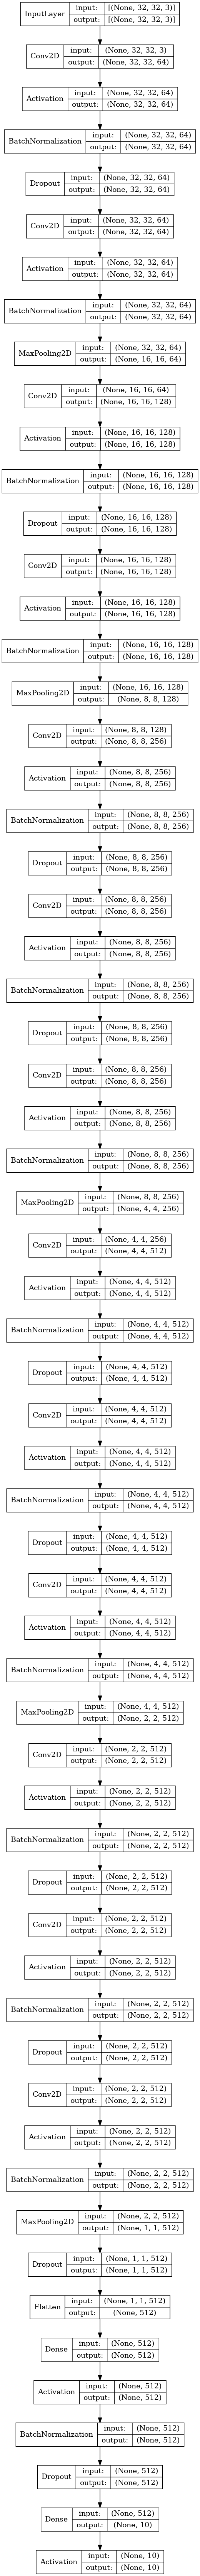

In [17]:
plot_model(model, show_shapes=True, show_layer_names=False)